# **Task 1 : Exploratory Data Analysis**

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

**1.	Load the Mushroom dataset and perform fundamental data exploration.**

In [10]:
df=pd.read_csv("/content/mushroom.csv")
df

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,863,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,...,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1996,1160,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957
1997,265,convex,grooves,green,yes,fishy,notched,close,narrow,pink,...,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020
1998,411,bell,smooth,white,no,pungent,free,close,narrow,orange,...,universal,yellow,one,cobwebby,brown,solitary,woods,poisonous,11.092703,8.423199


In [11]:
df.describe()

,Unnamed: 0,stalk_height,cap_diameter
count,2000.000000,2000.000000,2000.000000
mean,624.974000,8.449118,12.314345
std,375.091938,3.697217,7.048845
min,0.000000,2.000000,1.000000
25%,290.000000,5.291009,5.723521
50%,607.000000,8.318596,12.124902
75%,957.250000,11.781272,18.698605
max,1279.000000,15.095066,25.000054


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

In [13]:
df.isnull().sum()

,0
Unnamed: 0,0
cap_shape,0
cap_surface,0
cap_color,0
bruises,0
odor,0
gill_attachment,0
gill_spacing,0
gill_size,0
gill_color,0


In [14]:
df['class'].value_counts()

,count
class,
poisonous,1400
edible,600


In [15]:
# Numerical Distribution
num_features= ['stalk_height', 'cap_diameter']
num_features

['stalk_height', 'cap_diameter']

**2.	Utilize histograms, box plots, or density plots to understand feature distributions.**

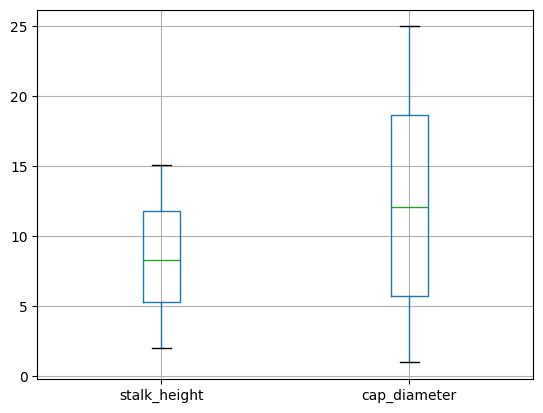

In [16]:
df.boxplot(column=num_features)
plt.show()

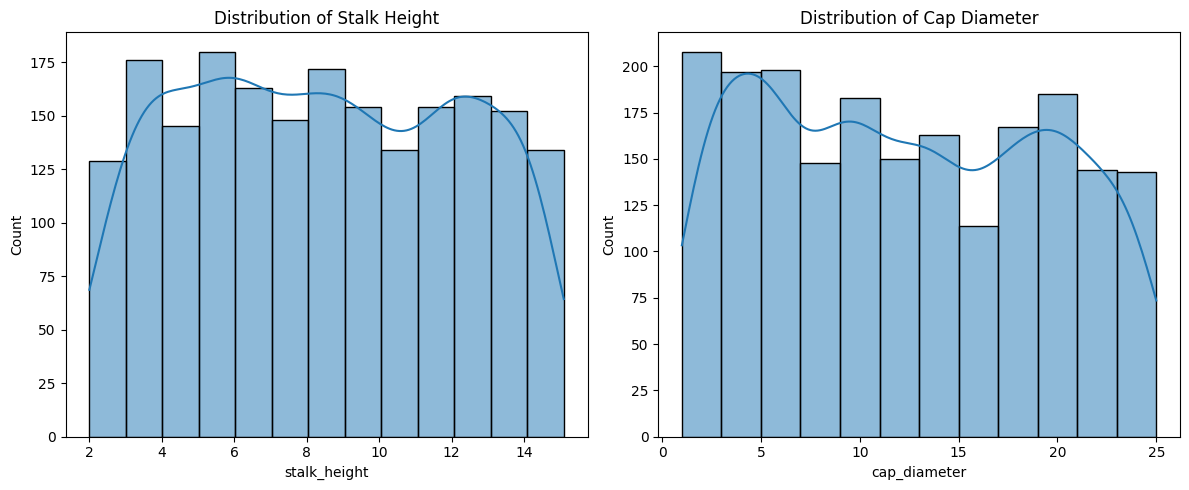

In [17]:
# Histogram for numerical features
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['stalk_height'], kde=True)
plt.title('Distribution of Stalk Height')

plt.subplot(1, 2, 2)
sns.histplot(df['cap_diameter'], kde=True)
plt.title('Distribution of Cap Diameter')

plt.tight_layout()
plt.show()


**3.	Investigate feature correlations to discern relationships within the data.**

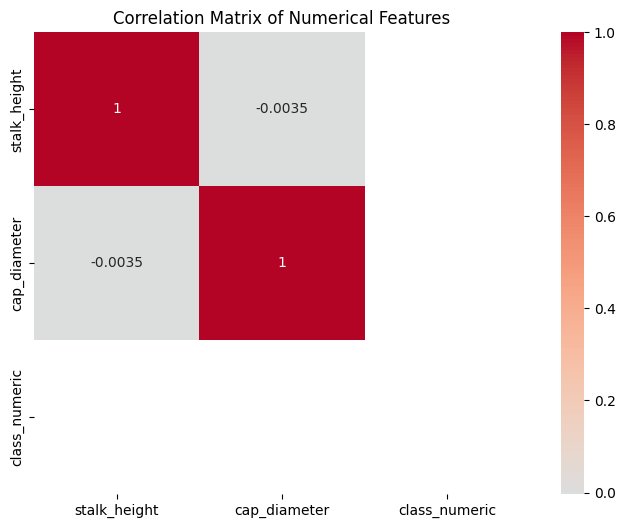

In [18]:
# Select only numerical features for correlation matrix
numerical_df = df[num_features + ['class']]

# Convert class to numerical for correlation
numerical_df['class_numeric'] = numerical_df['class'].map({'e': 0, 'p': 1})

plt.figure(figsize=(8, 6))
correlation_matrix = numerical_df[num_features + ['class_numeric']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# **Task 2 : Data Preprocessing**

**1.	Encode categorical variables if necessary.**

In [19]:
# Identify categorical columns (excluding the target and numerical features)
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
categorical_columns.remove('class')  # Remove target variable
categorical_columns = [col for col in categorical_columns if col not in num_features]
categorical_columns

['cap_shape',
 'cap_surface',
 'cap_color',
 'bruises',
 'odor',
 'gill_attachment',
 'gill_spacing',
 'gill_size',
 'gill_color',
 'stalk_shape',
 'stalk_root',
 'stalk_surface_above_ring',
 'stalk_surface_below_ring',
 'stalk_color_above_ring',
 'stalk_color_below_ring',
 'veil_type',
 'veil_color',
 'ring_number',
 'ring_type',
 'spore_print_color',
 'population',
 'habitat']

In [20]:
# Encode Categorical variable
from sklearn.preprocessing import LabelEncoder, StandardScaler
le = LabelEncoder()
df_encoded=df.copy()
for col in categorical_columns:
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
df_encoded

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,4,2,7,0,1,1,2,0,7,...,0,0,2,6,3,1,5,poisonous,14.276173,5.054983
1,1037,4,0,6,0,1,3,1,1,3,...,1,0,2,6,1,2,5,edible,3.952715,19.068319
2,309,3,1,5,1,4,1,1,0,8,...,1,3,2,6,6,0,5,poisonous,9.054265,7.205884
3,282,0,2,4,1,3,3,0,0,6,...,0,3,2,0,4,1,0,poisonous,5.226499,20.932692
4,820,3,3,8,1,5,2,1,1,6,...,1,2,0,4,8,1,4,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,863,4,2,0,1,4,0,1,1,3,...,0,1,1,2,6,0,1,poisonous,5.877891,17.464145
1996,1160,4,2,5,1,5,0,2,1,9,...,0,2,1,7,8,2,5,poisonous,6.500840,13.501957
1997,265,2,1,3,1,3,3,0,1,7,...,0,0,2,1,8,0,6,poisonous,13.558064,11.270020
1998,411,0,3,7,0,7,2,0,1,6,...,1,3,1,0,1,5,6,poisonous,11.092703,8.423199


In [21]:
# Encode Target variable
le_target=LabelEncoder()
df_encoded['class']=le_target.fit_transform(df_encoded['class'])
df_encoded

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,4,2,7,0,1,1,2,0,7,...,0,0,2,6,3,1,5,1,14.276173,5.054983
1,1037,4,0,6,0,1,3,1,1,3,...,1,0,2,6,1,2,5,0,3.952715,19.068319
2,309,3,1,5,1,4,1,1,0,8,...,1,3,2,6,6,0,5,1,9.054265,7.205884
3,282,0,2,4,1,3,3,0,0,6,...,0,3,2,0,4,1,0,1,5.226499,20.932692
4,820,3,3,8,1,5,2,1,1,6,...,1,2,0,4,8,1,4,1,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,863,4,2,0,1,4,0,1,1,3,...,0,1,1,2,6,0,1,1,5.877891,17.464145
1996,1160,4,2,5,1,5,0,2,1,9,...,0,2,1,7,8,2,5,1,6.500840,13.501957
1997,265,2,1,3,1,3,3,0,1,7,...,0,0,2,1,8,0,6,1,13.558064,11.270020
1998,411,0,3,7,0,7,2,0,1,6,...,1,3,1,0,1,5,6,1,11.092703,8.423199


**2.	Split the dataset into training and testing sets.**

In [22]:
# Seperate X and Y
x=df_encoded.drop(['class','Unnamed: 0'],axis=1) # Drop index column
y=df_encoded['class']

In [23]:
# Split in train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42, stratify=y)

# **Task 3 : Data Visulaization**

**1.	Employ scatter plots, pair plots, or relevant visualizations to comprehend feature distributions and relationships.**

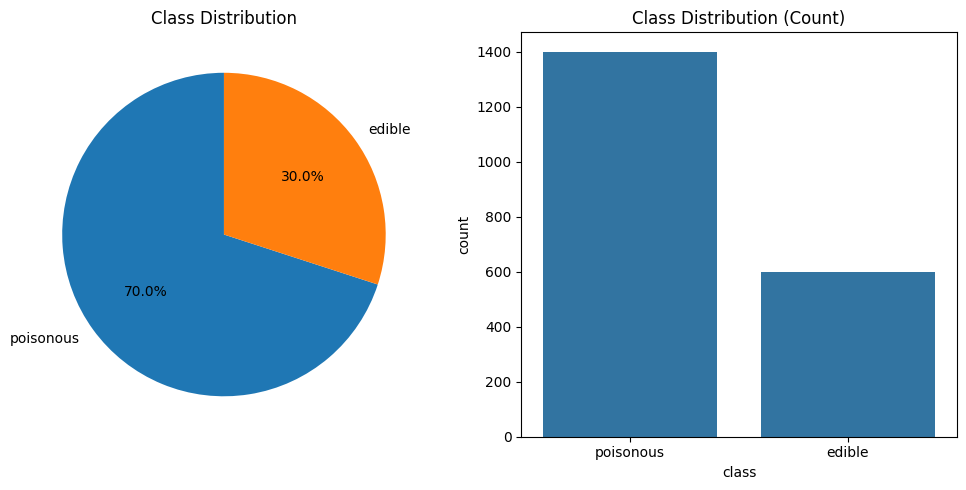

In [24]:
# Class distribution visualization
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
class_counts = df['class'].value_counts()
plt.pie(class_counts.values, labels=class_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Class Distribution')

plt.subplot(1, 2, 2)
sns.countplot(data=df, x='class')
plt.title('Class Distribution (Count)')
plt.tight_layout()
plt.show()

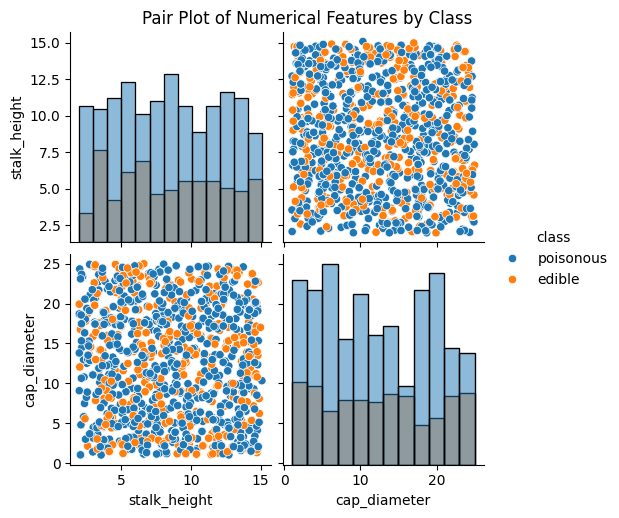

In [25]:
# Feature relationships - Pair plot for numerical features
numerical_with_class = num_features + ['class']
sns.pairplot(df[numerical_with_class], hue='class', diag_kind='hist')
plt.suptitle('Pair Plot of Numerical Features by Class', y=1.02)
plt.show()

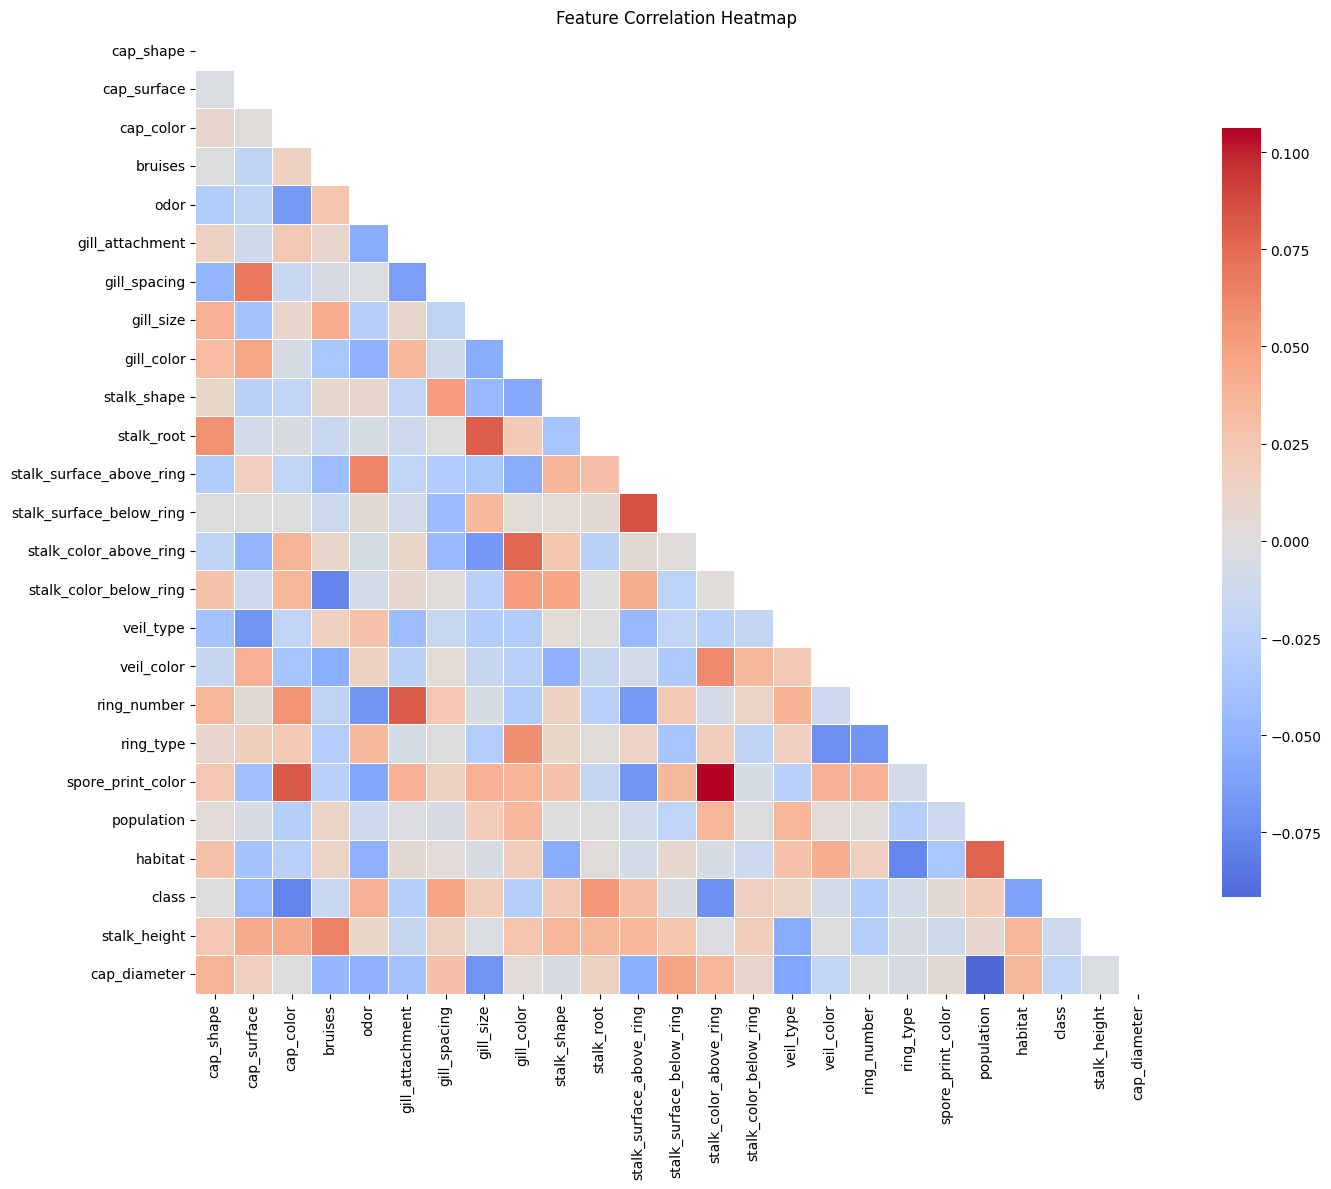

In [26]:
# Correlation heatmap for all encoded features
plt.figure(figsize=(15, 12))
corr_matrix = df_encoded.drop('Unnamed: 0', axis=1).corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

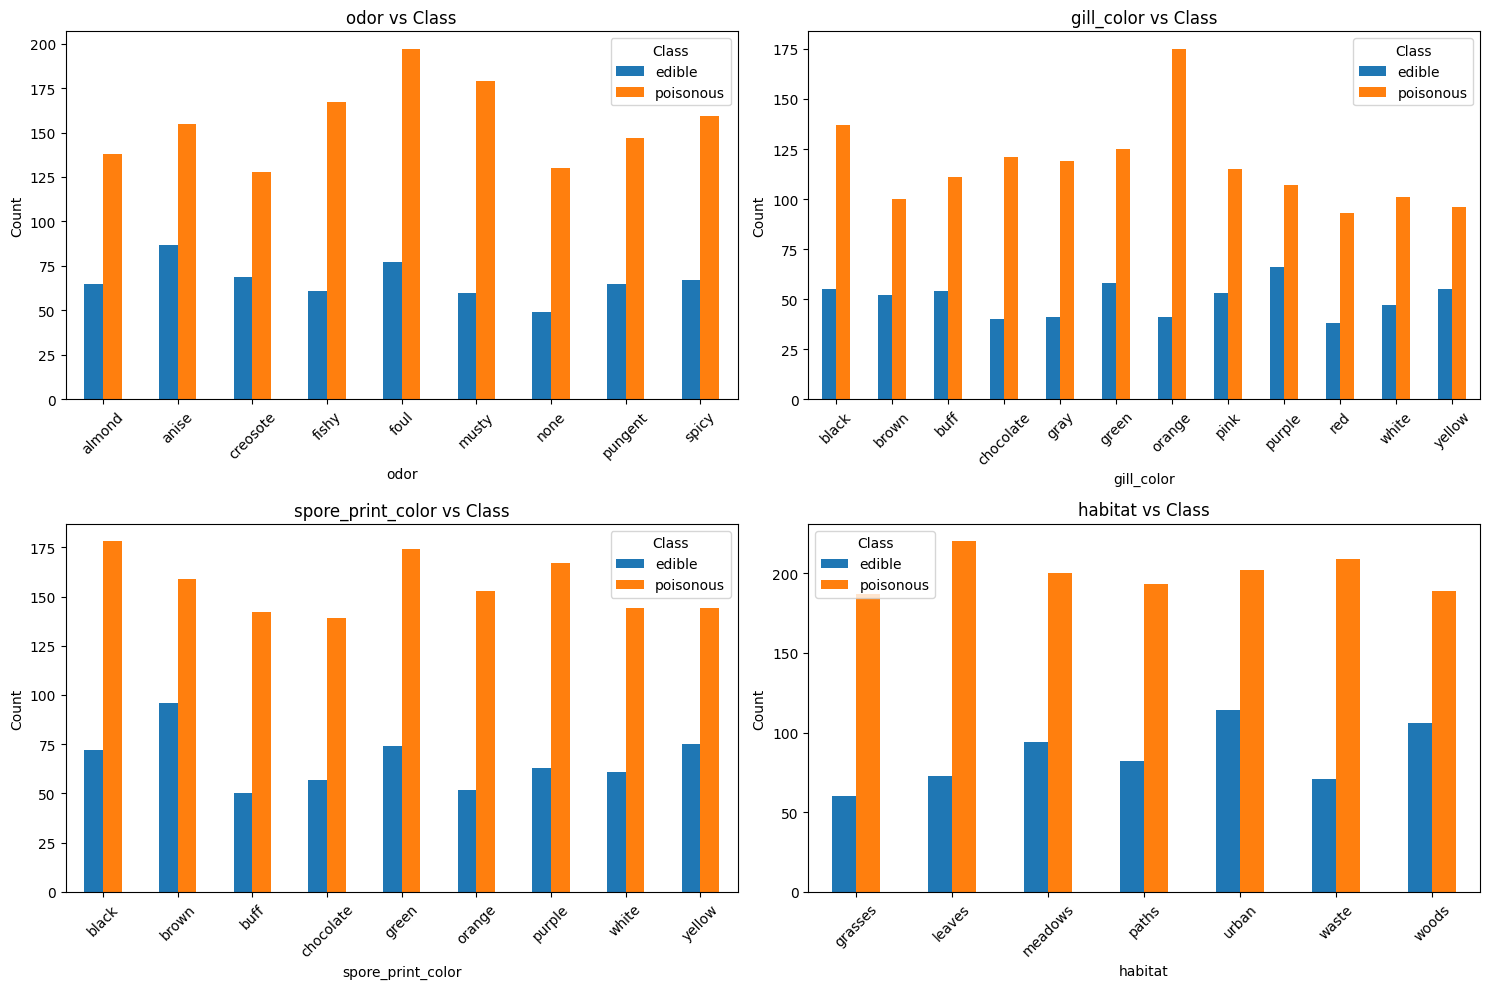

In [27]:
# Distribution of important categorical features
important_categorical = ['odor', 'gill_color', 'spore_print_color', 'habitat']

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for i, feature in enumerate(important_categorical):
    pd.crosstab(df[feature], df['class']).plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'{feature} vs Class')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')
    axes[i].legend(title='Class')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# **Task 4 : SVM Implementation**

**1.	Implement a basic SVM classifier using Python libraries like scikit-learn.**

In [28]:
# Scaling for better performance
ss=StandardScaler()
x_train_scaled=ss.fit_transform(x_train)
x_test_scaled=ss.transform(x_test)

**2.	Train the SVM model on the training data.**

In [29]:
# SNM Model Building
from sklearn.svm import SVC
svm=SVC(kernel='rbf',random_state=42)
svm.fit(x_train_scaled,y_train)

SVC(random_state=42)

In [30]:
# Make Prediction
y_pred=svm.predict(x_test_scaled)
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

**3.	Evaluate model performance on the testing data using appropriate metrics (e.g., accuracy, precision, recall, F1-score).**

In [31]:
# Evaluate Model Performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Accuracy Score
svm_accuracy=accuracy_score(y_test,y_pred)
print(f"\nSVM Model Performance:")
print(f"      Accuracy:", svm_accuracy)

# Prcision Score
svm_precision = precision_score(y_test, y_pred)
print(f"      Precision:", svm_precision)

# Recall Score
svm_recall = recall_score(y_test, y_pred)
print(f"      Recall:", svm_recall)

# F1 Score
svm_f1 = f1_score(y_test, y_pred)
print(f"      F1-Score:", svm_f1)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


SVM Model Performance:
      Accuracy: 0.775
      Precision: 0.7668539325842697
      Recall: 0.975
      F1-Score: 0.8584905660377359

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.31      0.45       120
           1       0.77      0.97      0.86       280

    accuracy                           0.78       400
   macro avg       0.80      0.64      0.65       400
weighted avg       0.79      0.78      0.74       400



# **Task 5 : Visualization of SVM Results**

**1.	Visualize classification results on the testing data.**

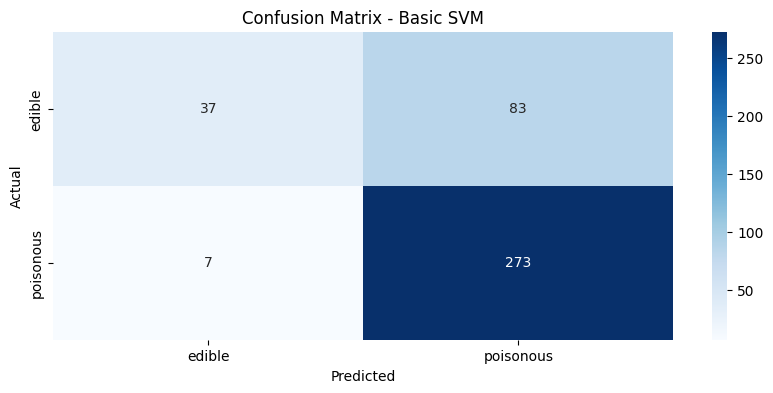

In [32]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(10,4))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le_target.classes_,
            yticklabels=le_target.classes_)
plt.title('Confusion Matrix - Basic SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

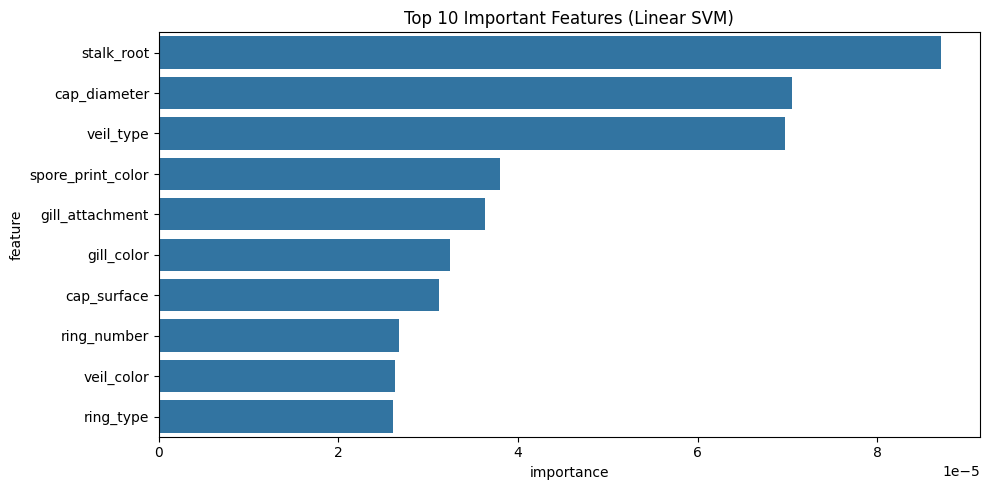

In [33]:
# Feature importance (using absolute coefficients from linear kernel)
plt.figure(figsize=(10, 5))
# Train a linear SVM to get feature importance
svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(x_train_scaled, y_train)

# Get feature importance (absolute coefficients)
feature_importance = pd.DataFrame({
    'feature': x.columns,
    'importance': np.abs(svm_linear.coef_[0])
}).sort_values('importance', ascending=False).head(10)

sns.barplot(data=feature_importance, x='importance', y='feature')
plt.title('Top 10 Important Features (Linear SVM)')
plt.tight_layout()
plt.show()

# **Task 6 : Parameter Tuning and Optimization**

**1.	Experiment with different SVM hyperparameters (e.g., kernel type, regularization parameter) to optimize performance.**

In [34]:
from sklearn.model_selection import GridSearchCV
param_grid={
    'C':[0.1,1,10,100],
    'kernel':['linear','rbf','poly','sigmoid'],
    'gamma':[1,0.1,0.01,0.001]
}

print("Performing Grid Search for optimal parameters...")
# Use smaller dataset for faster grid search for demonstration
x_train_small, _, y_train_small, _ = train_test_split(
    x_train_scaled, y_train, test_size=0.7, random_state=42, stratify=y_train)

grid_search=GridSearchCV(SVC(random_state=42),param_grid,refit=True,verbose=3,cv=3, scoring='accuracy',n_jobs=1)
grid_search.fit(x_train_small,y_train_small)

print("Best Parameters:",grid_search.best_params_)
print("Best Cross-Validation Score:",grid_search.best_score_)

# Train optimized model
svm_optimized = grid_search.best_estimator_
y_pred_optimized = svm_optimized.predict(x_test_scaled)

accuracy_optimized = accuracy_score(y_test, y_pred_optimized)
print(f"\nOptimized SVM Performance:")
print(f"Accuracy: {accuracy_optimized:.4f}")

Performing Grid Search for optimal parameters...
Fitting 3 folds for each of 64 candidates, totalling 192 fits
[CV 1/3] END .....C=0.1, gamma=1, kernel=linear;, score=0.700 total time=   0.0s
[CV 2/3] END .....C=0.1, gamma=1, kernel=linear;, score=0.700 total time=   0.0s
[CV 3/3] END .....C=0.1, gamma=1, kernel=linear;, score=0.700 total time=   0.0s
[CV 1/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.700 total time=   0.0s
[CV 2/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.700 total time=   0.0s
[CV 3/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.700 total time=   0.0s
[CV 1/3] END .......C=0.1, gamma=1, kernel=poly;, score=0.731 total time=   0.0s
[CV 2/3] END .......C=0.1, gamma=1, kernel=poly;, score=0.750 total time=   0.0s
[CV 3/3] END .......C=0.1, gamma=1, kernel=poly;, score=0.719 total time=   0.0s
[CV 1/3] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.731 total time=   0.0s
[CV 2/3] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.675 total time=   0.0

# **Task 7 : Comparision and Analysis**

**1.	Compare SVM performance with various kernels (e.g., linear, polynomial, radial basis function).**

In [35]:
# Compare different kernels
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
results = {}

print("Comparing different SVM kernels...")
for kernel in kernels:
    if kernel == 'poly':
        # Polynomial kernel with degree 3
        svm = SVC(kernel=kernel, degree=3, random_state=42)
    else:
        svm = SVC(kernel=kernel, random_state=42)

    svm.fit(x_train_scaled, y_train)
    y_pred = svm.predict(x_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    results[kernel] = accuracy
    print(f"{kernel.upper()} Kernel Accuracy: {accuracy:.4f}")


Comparing different SVM kernels...
LINEAR Kernel Accuracy: 0.7000
POLY Kernel Accuracy: 0.8125
RBF Kernel Accuracy: 0.7750
SIGMOID Kernel Accuracy: 0.6725


In [36]:
# Final comparison table
comparison_df = pd.DataFrame({
    'Model': ['Basic SVM (RBF)', 'Optimized SVM'] + [f'SVM ({k.upper()})' for k in kernels],
    'Accuracy': [svm_accuracy, accuracy_optimized] + list(results.values())
})

print("\n FINAL COMPARISON TABLE:")
print(comparison_df.to_string(index=False))


 FINAL COMPARISON TABLE:
          Model  Accuracy
Basic SVM (RBF)    0.7750
  Optimized SVM    0.7475
   SVM (LINEAR)    0.7000
     SVM (POLY)    0.8125
      SVM (RBF)    0.7750
  SVM (SIGMOID)    0.6725


**2.	Analyze SVM strengths and weaknesses for the Mushroom dataset based on EDA and visualization results.**

Ans:- Based on the EDA and visualization results, we can analyze the strengths and weaknesses of using SVM for this mushroom dataset:

**Strengths**:

* **Handling Categorical Features (after Encoding)**: SVMs can effectively handle the encoded categorical features. The dataset has many categorical variables, and the encoding step allows SVM to process them.
* Potential for Non-linear Separation **bold text**: The pair plot and correlation heatmap suggest that the relationship between features and the target variable might not be strictly linear. Kernels like RBF and polynomial can capture these non-linear decision boundaries, which is a strength of SVMs. The polynomial kernel, in particular, showed the highest accuracy in the comparison.
* **Feature Importance Insight (Linear Kernel)**: While the RBF kernel was initially used, training a linear SVM provided some insight into feature importance, showing which features (like 'stalk_root', 'cap_diameter', 'veil_type') might be more influential in a linear separation, even though a non-linear kernel performed better overall.

**Weaknesses**:

* **Sensitivity to Scaling**: SVMs are sensitive to the scale of features. The scaling step was necessary and applied, but incorrect or missing scaling would negatively impact performance.
* **Interpretability with Non-linear Kernels**: As noted in the general implications, interpreting the learned decision boundaries with non-linear kernels (like the RBF kernel used in the basic model) is less straightforward than with simpler models.
* **Performance on Imbalanced Data**: The dataset has a class imbalance (more poisonous than edible mushrooms). While SVMs can handle some imbalance, their performance might be affected, potentially favoring the majority class. The recall for the minority class (edible, class 0) is significantly lower than for the majority class (poisonous, class 1), as seen in the classification report. This indicates a weakness in correctly identifying edible mushrooms.
* **Hyperparameter Tuning Complexity**: The performance of SVMs is highly dependent on hyperparameter tuning. The grid search demonstrated that finding the optimal parameters can be computationally intensive, especially with a larger search space or dataset. The optimized model's accuracy was slightly lower than the basic RBF model, possibly due to the small subset of the training data used for grid search in this demonstration, highlighting the importance of thorough tuning on the full training set.

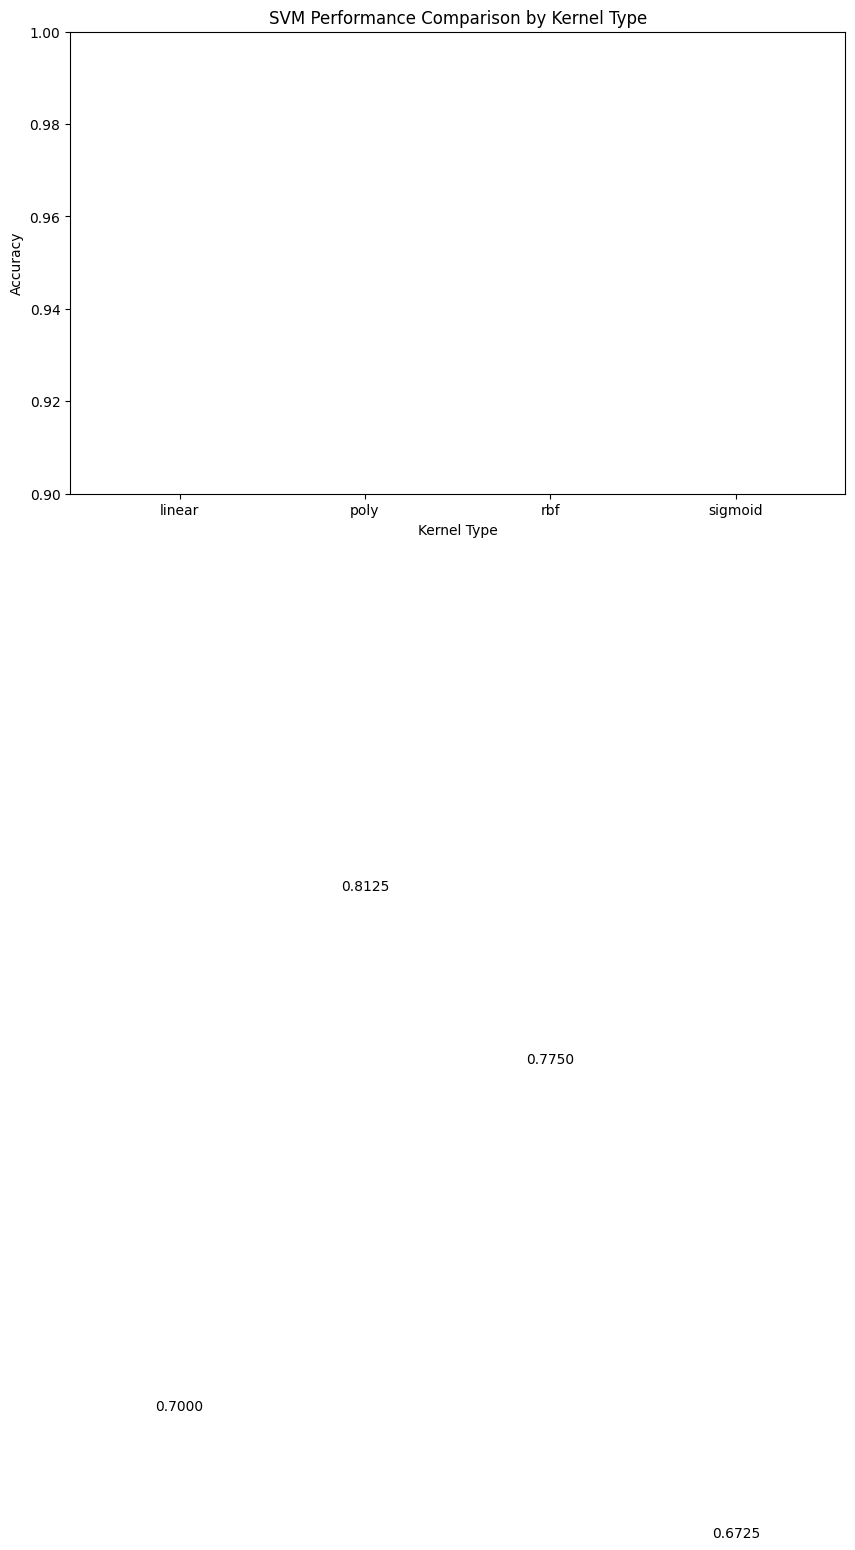

In [37]:
# Visualization of kernel comparison
plt.figure(figsize=(10, 6))
kernel_names = list(results.keys())
accuracies = list(results.values())

bars = plt.bar(kernel_names, accuracies, color=['skyblue', 'lightgreen', 'lightcoral', 'gold'])
plt.ylim(0.9, 1.0)
plt.title('SVM Performance Comparison by Kernel Type')
plt.ylabel('Accuracy')
plt.xlabel('Kernel Type')

# Add value labels on bars
for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.001,
             f'{accuracy:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

**3.	Discuss practical implications of SVM in real-world classification tasks.**

Ans:- Support Vector Machines (SVMs) are powerful and versatile algorithms for classification and regression tasks. Here are some practical implications of using SVMs in real-world scenarios:

* **Handling High-Dimensional Data**: SVMs are particularly effective in high-dimensional spaces, making them suitable for tasks like text classification or image recognition where the number of features can be very large.
* **Robustness to Outliers**: The use of a margin in SVMs makes them less sensitive to outliers compared to some other classification algorithms.
* **Versatility with Kernels**: The ability to use different kernel functions (linear, polynomial, RBF, etc.) allows SVMs to model complex non-linear relationships between features and the target variable. This flexibility makes them applicable to a wide range of problems.
* **Effective in Cases with Clear Margin of Separation**: When there is a clear margin of separation between classes, SVMs can find the optimal hyperplane to maximize this margin, leading to good generalization performance.
* **Computational Cost**: For large datasets, training SVMs can be computationally expensive, especially with non-linear kernels. This is a consideration in real-world applications with massive amounts of data.
* **Interpretability**: Interpreting the results of SVM models, especially with non-linear kernels, can be challenging compared to simpler models like decision trees. Understanding feature importance can be less straightforward.
* **Parameter Tuning**: The performance of SVMs is highly dependent on the choice of hyperparameters (e.g., C, gamma). Proper parameter tuning using techniques like GridSearchCV is crucial for achieving optimal results.

In summary, SVMs are a valuable tool for classification tasks, offering strong performance in various domains. However, their computational cost and interpretability challenges should be considered when choosing the appropriate algorithm for a specific real-world problem.